# Algorithm

In [1]:
from nams import load_data as cf
G = cf.load_sociopatterns_network()

In [2]:
len(G.nodes()), len(G.edges())

(410, 2765)

In [11]:
# list(G.nodes())

## A Measure of Importance:

In [3]:
# query a graph for the number of neighbors of a given node:
G.neighbors(7)

In [6]:
list(G.neighbors(7))

[5, 6, 21, 22, 37, 48, 51]

In [95]:
# number of nb
dict(G.degree())[7]

7

In [32]:
from nams.solutions.hubs import rank_ordered_neighbors
from nams.solutions.hubs import rank_ordered_neighbors_original
from nams.solutions.hubs import rank_ordered_neighbors_generator

## Rank_ordered_neighbors

In [52]:
def rank_ordered_neighbors(G):
    result = {}
    for i in list(G.nodes()):
        result[i] = len(list(G.neighbors(i)))
    return result 


def rank_ordered_neighbors2(G):
    """
    Uses a pandas Series to help with sorting.
    """
    s = pd.Series({n: len(list(G.neighbors(n))) for n in G.nodes()})
    return s.sort_values(ascending=False)

In [53]:
result = rank_ordered_neighbors(G)
result2 = rank_ordered_neighbors2(G)

In [29]:
ans = sorted(result.items(), key=lambda x: x[1], reverse=True)

In [78]:
def plot_distribution(x,label):
    plt.hist(x, density=True, bins=30) # density=False would make counts
    plt.ylabel('Probability')
    plt.xlabel(label)

In [83]:
deg_dist=list(result.values())

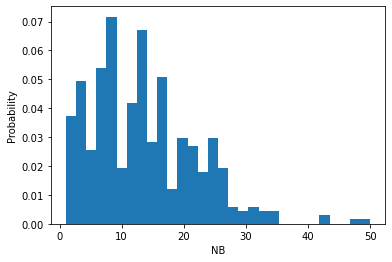

In [85]:
plot_distribution(deg_dist,"NB")

## Degree centrality metric.

### neighbors
the number of nodes that a given node could possibly be connected to. By taking the ratio of the number of neighbors a node has to the number of neighbors it could possibly have
 
$$d = \dfrac{n}{N}$$

- degree centrality metric
- the number of neighbors that a node has (let's call it n)
- the number of neighbors it could possibly have (let's call it N):

In [75]:
print("degree centrality of node {} is {:.6f}".format(100, len(list(G.neighbors(100)))/len(G.nodes())))
print("degree centrality of node {} is {:.6f}".format(101, len(list(G.neighbors(101)))/len(G.nodes())))
print("degree centrality of node {} is {:.6f}".format(102, len(list(G.neighbors(102)))/len(G.nodes())))

degree centrality of node 100 is 0.070732
degree centrality of node 101 is 0.031707
degree centrality of node 102 is 0.039024


In [35]:
import networkx as nx
import pandas as pd
dcs = pd.Series(nx.degree_centrality(G))
dcs

100    0.070905
101    0.031785
102    0.039120
103    0.063570
104    0.041565
         ...   
89     0.009780
91     0.051345
96     0.036675
99     0.034230
98     0.002445
Length: 410, dtype: float64

In [37]:
dcs.sort_values(ascending=False)

51     0.122249
272    0.114914
235    0.105134
195    0.105134
265    0.083130
         ...   
390    0.002445
135    0.002445
398    0.002445
186    0.002445
98     0.002445
Length: 410, dtype: float64

Text(0.5, 1.0, 'ecdf')

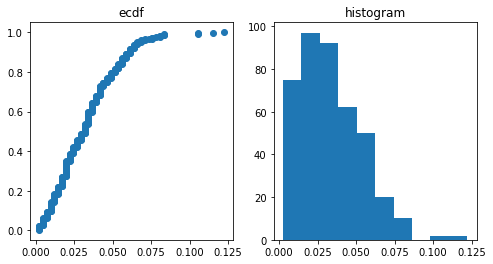

In [77]:
from nams.functions import ecdf
from nams.solutions.hubs import ecdf_degree_centrality
import matplotlib.pyplot as plt
import numpy as np


# empirical cumulative distribution function
def ecdf(data):
    x, y = np.sort(data), np.arange(1, len(data)+1) / len(data)
    return x, y


def ecdf_degree_centrality(G):
    """ECDF of degree centrality."""
    x, y = ecdf(list(nx.degree_centrality(G).values()))
    plt.scatter(x, y)
    plt.xlabel("degree centrality")
    plt.ylabel("cumulative fraction")
    
    
fig = plt.figure(figsize=(8, 4))
ax_ecdf = fig.add_subplot(121)
ax_hist = fig.add_subplot(122)
ax_hist.set_title('histogram')

mx = np.concatenate([dcs])
ax_hist.hist(mx)
x, y = ecdf(mx)

x, y = ecdf(dcs)
ax_ecdf.scatter(x, y)
ax_ecdf.set_title('ecdf')

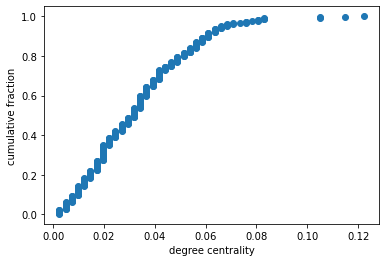

In [56]:
ecdf_degree_centrality(G)

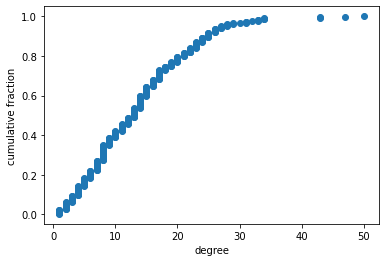

In [97]:
from nams.solutions.hubs import ecdf_degree

def ecdf_degree(G):
    """ECDF of degree."""
    num_neighbors = [len(list(G.neighbors(n))) for n in G.nodes()]
    x, y = ecdf(num_neighbors)
    plt.scatter(x, y)
    plt.xlabel("degree")
    plt.ylabel("cumulative fraction")

#### REPLACE THE FUNCTION CALL WITH YOUR ANSWER
ecdf_degree(G)

In [49]:
from nams.solutions.hubs import num_possible_neighbors

print(num_possible_neighbors())


The number of possible neighbors can either be defined as:

1. All other nodes but myself
2. All other nodes and myself

If $K$ is the number of nodes in the graph,
then if defined as (1), $N$ (the denominator) is $K - 1$.
If defined as (2), $N$ is equal to $K$.



In [59]:
import nxviz as nv
from nams.solutions.hubs import circos_plot

In [60]:
def circos_plot(G):
    """Draw a Circos Plot of the graph."""
    # c = CircosPlot(G, node_order="order", node_color="order")
    # c.draw()
    nv.circos(G, sort_by="order", node_color_by="order")
    annotate.node_colormapping(G, color_by="order")

# Reflections

In [ ]:
In other settings, it might help us spot:

message amplifiers/influencers in a social network, and
potentially crowded airports that have lots of connections into and out of it (still relevant to infectious disease spread!)
and many more!
